In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = 'AI Project Dataset - Final.csv'  # Update path as needed
csv = pd.read_csv(file_path)

# Step 1: Clean the dataset by removing unnecessary columns and handling missing values
columns_to_drop = ['Unnamed: 41']
data = csv.drop(columns=columns_to_drop)

# Select relevant columns
relevant_columns = [
    'Habitat Comments', 'Threat Comments', 'Food Comments',
    'Short-term Trend Comments', 'Long-term Trend'
]
comments_data = data[relevant_columns].fillna('Unknown')  # Replace NaN values

# Preprocessing text (improved example)
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Remove special characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Tokenize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function
comments_data = comments_data.applymap(clean_text)

# Food Category Keywords
food_categories = {
    "Carnivore": {"insect", "mammal", "bird", "fish", "animal", "prey", "snake", "frog", "lizard", "crustacean", "spider", "squid", "worm"},
    "Herbivore": {"plant", "herb", "foliage", "leaves", "roots", "grass", "fruit", "flower", "seed", "algae"},
    "Detritivore": {"detritus", "organic material", "decay", "rotting", "faeces", "decomposing"},
    "Sanguivore": {"blood"},
    "Insectivore": {"insect", "ant", "termite", "bug", "beetle"},
    "Frugivore": {"fruit", "berry"},
    "Granivore": {"seed", "grain"},
    "Folivore": {"leaves", "foliage"},
    "Piscivore": {"fish", "marine"},
    "Molluscivore": {"mollusc", "snail", "clam", "oyster"},
    "Vermivore": {"worm"},
    "Xylophage": {"wood", "bark"},
    "Coprophage": {"faeces", "excrement", "dung"},
    "Scavenger": {"carrion", "dead animal", "carcass"}
}

# Habitat Category Keywords
habitat_categories = {
    "Forest": {"forest", "boreal", "subarctic", "temperate", "tropical", "mangrove", "swamp"},
    "Wetlands": {"wetlands", "marsh", "bog", "stream", "lake", "delta", "pond"},
    "Marine": {"marine", "ocean", "coastal", "neritic", "intertidal", "benthic"},
    "Grassland": {"grassland", "tundra", "pasture"},
    "Savanna": {"savanna", "dry savanna", "moist savanna"},
    "Desert": {"desert", "hot desert", "cold desert"},
    "Rocky Areas": {"rocky", "cliffs", "mountains"},
    "Caves": {"cave", "subterranean"}
}

# Threats Category Keywords
threat_categories = {
    "Housing & Urban Areas": {"housing", "urban", "commercial", "industrial", "tourism", "recreation"},
    "Crops & Plantations": {"crops", "non-timber", "plantations", "livestock", "ranching", "aquaculture"},
    "Mining & Energy": {"oil", "gas", "drilling", "mining", "quarrying", "renewable energy"},
    "Infrastructure": {"roads", "railroads", "utility", "shipping", "service lines"},
    "Hunting & Logging": {"hunting", "trapping", "logging", "wood harvesting", "fishing", "aquatic harvesting"},
    "Human Activities": {"recreation", "war", "military", "work", "fire", "fire suppression"},
    "Ecosystem Modifications": {"dams", "water management", "ecosystem modifications"},
    "Invasive Species & Diseases": {
        "invasive", "alien species", "native species", "genetic material",
        "viral", "prion", "disease", "unknown cause"
    },
    "Pollution": {
        "domestic waste", "urban waste", "industrial effluents", "military effluents",
        "agriculture effluents", "garbage", "solid waste", "air-borne pollutants", "excess energy"
    },
    "Climate Change": {"habitat shifting", "droughts", "temperature extremes", "storms", "flooding", "other impacts"},
    "Unknown": {"unknown"}
}

# Classification function
def classify_comment(text, categories):
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            return category
    return "Unknown"

# Apply classification for each column
data['Inferred Food Category'] = comments_data['Food Comments'].apply(lambda x: classify_comment(x, food_categories))
data['Inferred Habitat Category'] = comments_data['Habitat Comments'].apply(lambda x: classify_comment(x, habitat_categories))
data['Inferred Threat Category'] = comments_data['Threat Comments'].apply(lambda x: classify_comment(x, threat_categories))

# Analyze results
print("Food Category Distribution:")
print(data['Inferred Food Category'].value_counts())

print("\nHabitat Category Distribution:")
print(data['Inferred Habitat Category'].value_counts())

print("\nThreat Category Distribution:")
print(data['Inferred Threat Category'].value_counts())

# Save the results to a new file
data.to_csv('classified_dataset_with_inferred_categories.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-2-652b57704aed>:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  comments_data = comments_data.applymap(clean_text)


Food Category Distribution:
Inferred Food Category
Carnivore       2985
Unknown          167
Herbivore         56
Insectivore        8
Detritivore        7
Molluscivore       3
Granivore          1
Name: count, dtype: int64

Habitat Category Distribution:
Inferred Habitat Category
Unknown        2130
Forest          529
Wetlands        449
Marine           46
Rocky Areas      41
Caves            13
Grassland        10
Desert            5
Savanna           4
Name: count, dtype: int64

Threat Category Distribution:
Inferred Threat Category
Unknown                        2808
Housing & Urban Areas           270
Mining & Energy                  39
Human Activities                 38
Hunting & Logging                32
Invasive Species & Diseases      28
Infrastructure                    5
Crops & Plantations               4
Climate Change                    2
Pollution                         1
Name: count, dtype: int64


In [ ]:
import re

def classify_comment(text, categories):
    for category, keywords in categories.items():
        if any(re.search(rf'\b{keyword}\b', text.lower()) for keyword in keywords):
            return category
    return "Unknown"  # Default if no match found

In [ ]:
# Combine Threat Comments and Tags for Threat Category
def classify_threat(row):
    combined_text = f"{row['Threat Comments']} {row['useTrade']} {row['Tags']}".lower()  # Combine text
    return classify_comment(combined_text, threat_categories)

# Combine Habitat Comments and Systems for Habitat Category
def classify_habitat(row):
    combined_text = f"{row['Habitat Comments']} {row['systems']}".lower()  # Combine text
    return classify_comment(combined_text, habitat_categories)

# Apply classification for Threat and Habitat Categories
data['Threat Category'] = data.apply(classify_threat, axis=1)
data['Habitat Category'] = data.apply(classify_habitat, axis=1)

# Food Category (unchanged from before)
data['Food Category'] = data['Food Comments'].fillna("Unknown").apply(
    lambda x: classify_comment(x, food_categories)
)


In [ ]:
# Analyze classification results
print("Habitat Category Distribution:")
print(data['Habitat Category'].value_counts())

print("Food Category Distribution:")
print(data['Food Category'].value_counts())

print("Threat Category Distribution:")
print(data['Threat Category'].value_counts())

Habitat Category Distribution:
Habitat Category
Unknown        2501
Forest          274
Wetlands        180
Marine          116
Rocky Areas     107
Grassland        26
Caves            12
Savanna           6
Desert            5
Name: count, dtype: int64
Food Category Distribution:
Food Category
Carnivore       2514
Unknown          492
Herbivore        159
Scavenger         14
Piscivore         14
Granivore         12
Detritivore        8
Insectivore        7
Xylophage          4
Molluscivore       2
Coprophage         1
Name: count, dtype: int64
Threat Category Distribution:
Threat Category
Housing & Urban Areas          2965
Crops & Plantations              64
Mining & Energy                  35
Ecosystem Modifications          32
Hunting & Logging                29
Climate Change                   25
Human Activities                 24
Infrastructure                   21
Invasive Species & Diseases      17
Unknown                          13
Pollution                         2
Name:

In [ ]:
# Save the classified dataset
data.to_csv("classified_dataset.csv", index=False)
data_dropped = data.drop(data.columns[42], axis=1)

# Integrate these new columns as features for downstream models
selected_features = ['Habitat Category', 'Food Category', 'Threat Category']
final_features = pd.get_dummies(data[selected_features])  # One-hot encoding for categorical variables

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 1: Define the target columns
status_columns = ['NatureServe Rank', 'Global Status Reasons', 'Global Status Comments',
                  'COSEWIC Status', 'U.S. Endangered Species Act Status', 'redlistCategory']

# Step 2: Extract and encode the target variables
y_multilabel = data[status_columns].fillna("Unknown").values  # Replace NaN with 'Unknown'
mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(y_multilabel)

# Check the transformed target labels
print(f"Shape of multi-label target: {y_multilabel.shape}")

# Continue with train-test split and modeling
X_train, X_test, y_train, y_test = train_test_split(final_features, y_multilabel, test_size=0.3, random_state=42)

# Example: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Example: SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.argmax(axis=1))  # Reduce multi-label to single-label for SVM
svm_accuracy = svm_model.score(X_test, y_test.argmax(axis=1))

print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Shape of multi-label target: (3227, 1012)
Random Forest Accuracy: 38.39%
SVM Accuracy: 94.74%


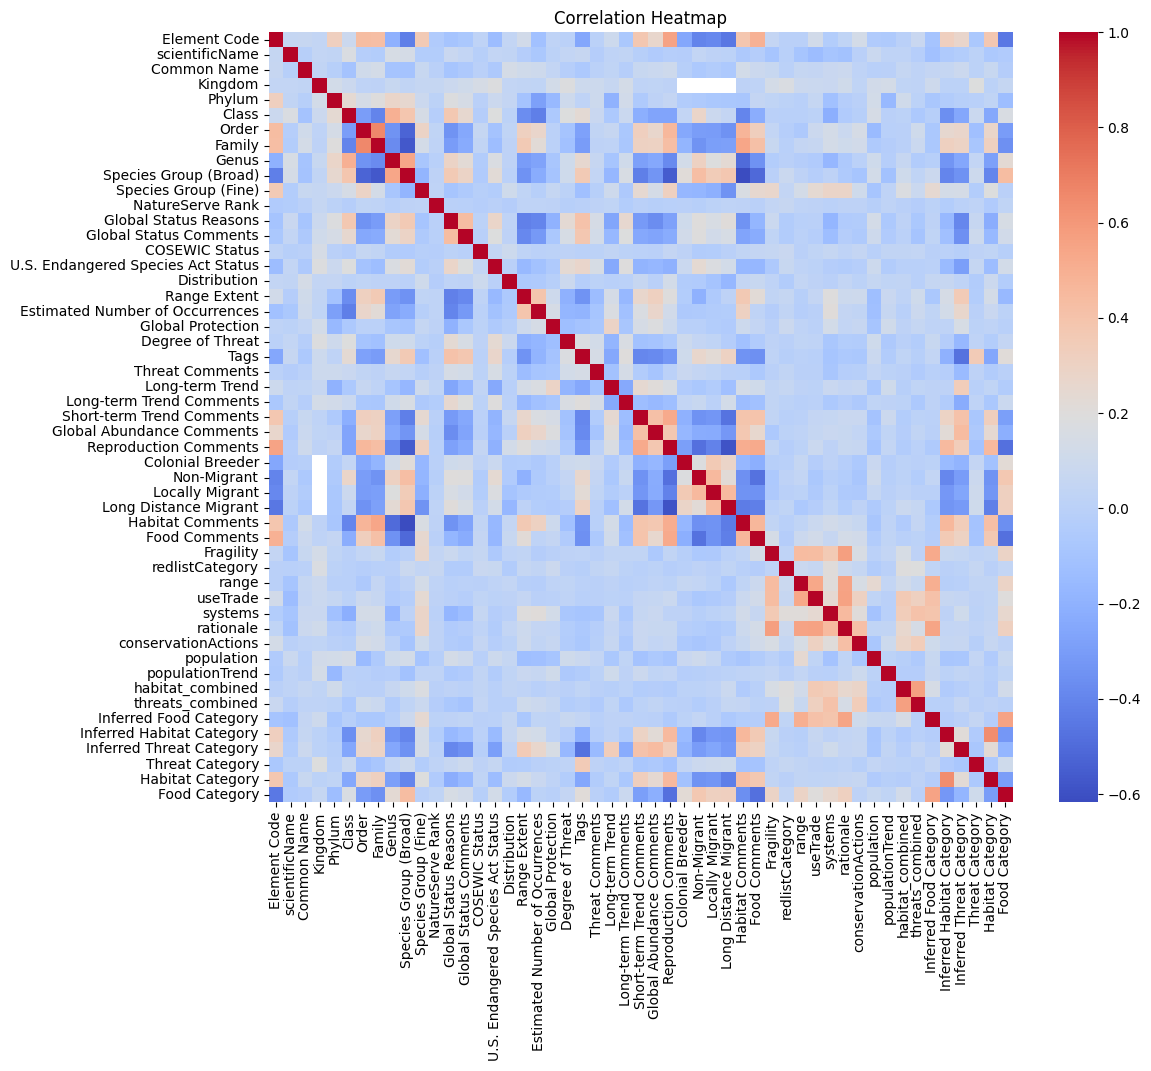

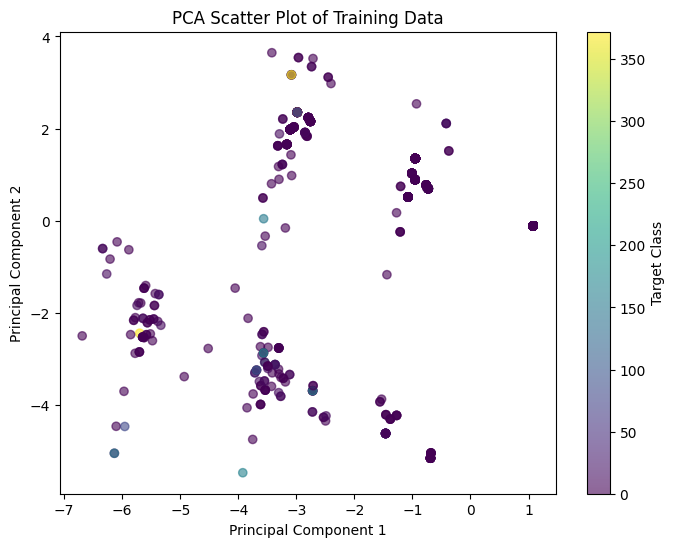

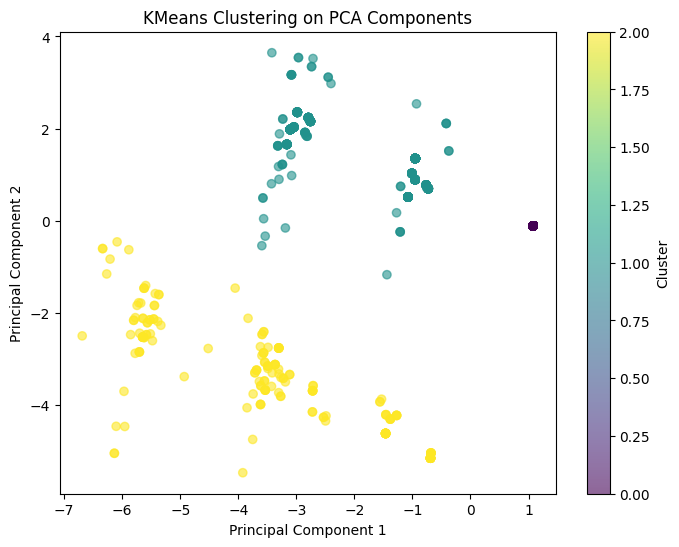

Random Forest Accuracy: 38.39%


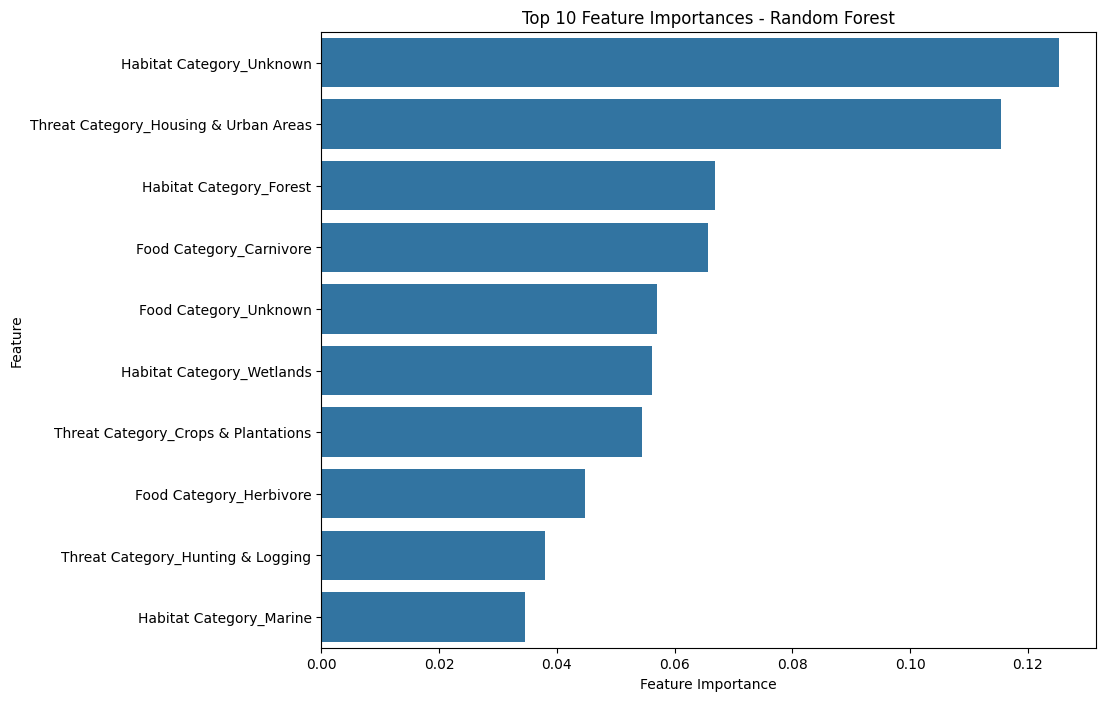

Logistic Regression Accuracy: 94.22%
SVM Accuracy: 94.74%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = 'classified_dataset.csv'  # Use the classified dataset
data = pd.read_csv(file_path)

from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
encoded_data = data.apply(
    lambda col: encoder.fit_transform(col.astype(str)) if col.dtypes == 'object' else col
)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Prepare Features
selected_features = ['Habitat Category', 'Food Category', 'Threat Category']
final_features = pd.get_dummies(data[selected_features])  # One-hot encoding
status_columns = ['NatureServe Rank', 'Global Status Reasons', 'Global Status Comments',
                  'COSEWIC Status', 'U.S. Endangered Species Act Status', 'redlistCategory']

# Encode Target Variables
y_multilabel = data[status_columns].fillna("Unknown").values  # Replace NaN with 'Unknown'
mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(y_multilabel)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(final_features, y_multilabel, test_size=0.3, random_state=42)

# Standardize Features for PCA and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.argmax(axis=1), cmap='viridis', alpha=0.6)
plt.colorbar(label='Target Class')
plt.title('PCA Scatter Plot of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
kmeans.fit(X_train_pca)
clusters = kmeans.predict(X_train_pca)

# Plot Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
important_features = pd.DataFrame({
    'Feature': final_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y=important_features['Feature'].head(10), x=important_features['Importance'].head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train.argmax(axis=1))
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test.argmax(axis=1), lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train.argmax(axis=1))
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test.argmax(axis=1), svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

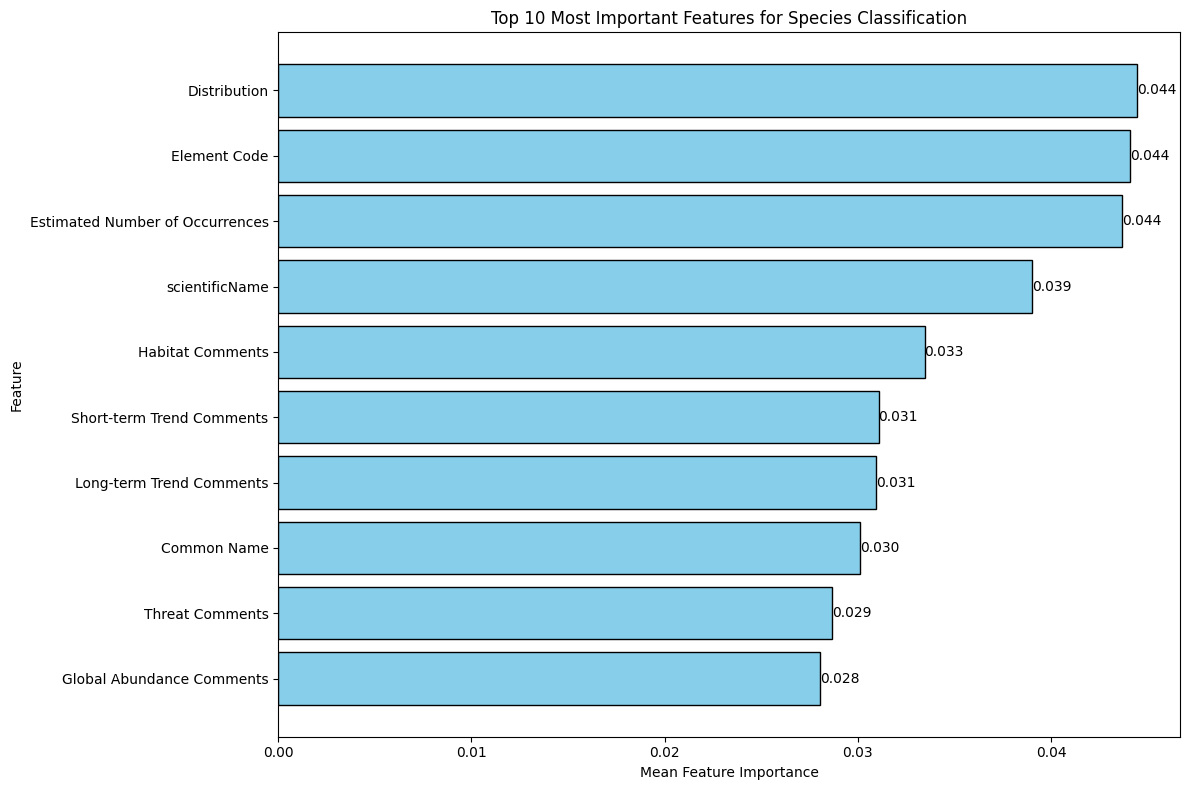

Training Accuracy: 1.000
Test Accuracy: 0.999

Explained Variance Ratio for PCA components:
Component 1: 0.186
Component 2: 0.088
Component 3: 0.067
Component 4: 0.043
Component 5: 0.042
Component 6: 0.032
Component 7: 0.028
Component 8: 0.027
Component 9: 0.027
Component 10: 0.025


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'classified_dataset.csv'
data = pd.read_csv(file_path)

# Handle missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_columns) > 0:
    data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handle missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical variables
encoder = LabelEncoder()
encoded_data = data.apply(
    lambda col: encoder.fit_transform(col.astype(str)) if col.dtypes == 'object' else col
)

# Define status columns
status_columns = [
    'NatureServe Rank', 'Global Status Reasons', 'Global Status Comments',
    'COSEWIC Status', 'U.S. Endangered Species Act Status', 'redlistCategory'
]

# Prepare target variables
status_data = data[status_columns]
mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(status_data.values)

# Prepare features (excluding status columns)
X_multilabel = encoded_data.drop(columns=status_columns)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multilabel)

# Train-test split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_scaled, y_multilabel, test_size=0.3, random_state=42
)

# PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_ml)
X_test_pca = pca.transform(X_test_ml)

# Train multi-output random forest
multi_rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_rf_model.fit(X_train_ml, y_train_ml)

# Calculate mean feature importance across all classifiers
feature_importances = np.mean(
    [est.feature_importances_ for est in multi_rf_model.estimators_],
    axis=0
)

# Create feature importance DataFrame
important_features = pd.DataFrame({
    'Feature': X_multilabel.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(
    important_features['Feature'].head(10),
    important_features['Importance'].head(10),
    color='skyblue',
    edgecolor='black'
)
plt.xlabel('Mean Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Species Classification')
plt.gca().invert_yaxis()

# Add importance values as text
for i, v in enumerate(important_features['Importance'].head(10)):
    plt.text(v, i, f'{v:.3f}', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Print model performance
y_pred_ml = multi_rf_model.predict(X_train_ml)
train_accuracy = np.mean(y_pred_ml == y_train_ml)
print(f"Training Accuracy: {train_accuracy:.3f}")

y_pred_test = multi_rf_model.predict(X_test_ml)
test_accuracy = np.mean(y_pred_test == y_test_ml)
print(f"Test Accuracy: {test_accuracy:.3f}")

# Print explained variance ratio for PCA components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for PCA components:")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var:.3f}")